# Factors that influence the salary (wages, earning)
Exam example

Enter your name here:

## Name:

## First Name:
    

We are given one-hot encoded panel data on earnings of 595 individuals for the years 1976–1982, originating from the [Panel Study of Income Dynamics](https://rdrr.io/cran/AER/man/PSID7682.html). The data were originally analyzed by Cornwell and Rupert (1988) and employed for assessing various instrumental-variable estimators for panel models.

**Your task is to predict the earnings class (`wage_class`) based on the remaining features.**

In [23]:
%%html
<style> |
table td, table th, table tr {text-align:left !important;}
</style>

A data frame containing 7 annual observations on 12 variables for 595 individuals.


| feature | description |
| --------| -------------|
| `experience` | Years of full-time work experience |
| `weeks` | Weeks worked |
| ` education` | Years of education. |
| `occupation_white` | factor. Is the individual a white-collar ("white"=`True`) or blue-collar ("blue"=`False`) worker? |
| `industry` | factor. Does the individual work in a manufacturing industry? |
| `south_yes` |factor. Does the individual reside in the South? |
| `smsa_yes` |factor. Does the individual reside in a SMSA (standard metropolitan statistical area)? |
| `married_yes` |factor. Is the individual married? |
| `gender_male` | factor indicating a male gender. |
| `union_yes` | factor. Is the individual's wage set by a union contract? |
| `ethnicity_other` |factor indicating ethnicity. Is the individual African-American ("afam") or not ("other")? |
| `wage_class` | **resopnse** $y$: Wage class (`['average, 'high', 'low', 'very high']`) |






Here, we import the necessary libraries.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Evaluation & CV Libraries
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
df_onehot=pd.read_csv('PSID_earnings_onehot.csv', index_col=0)
#df.info()
df_onehot.head()

,experience,weeks,education,occupation_white,industry_yes,south_yes,smsa_yes,married_yes,gender_male,union_yes,ethnicity_other,wage_class
1,3,32,9,1,0,1,0,1,1,0,1,low
2,4,43,9,1,0,1,0,1,1,0,1,low
3,5,40,9,1,0,1,0,1,1,0,1,low
4,6,39,9,1,0,1,0,1,1,0,1,low
5,7,42,9,1,1,1,0,1,1,0,1,low


We check for missing values and NaN, and remove them.

In [3]:
#drop missing values
df_onehot.dropna(inplace=True)
df_onehot.isnull().sum()

### (a) Extract the features $X$ and the response (label, target) $y$ of the dataset

- generate a `numpy` array `X` that contains the features $X$.
- generate a `numpy` array `y` that contains the response $y$.


In [4]:
# START CODE HERE #
#onehot-encoding of the qualitative features
features=df_onehot.columns[:-1]
X = df_onehot[features].values
y = df_onehot['wage_class'].values
# END CODE HERE #

### (b) Plot a histogram of the response $y$ (`'wage_class'`)
- Are the classes well balanced?
- Answer: ...

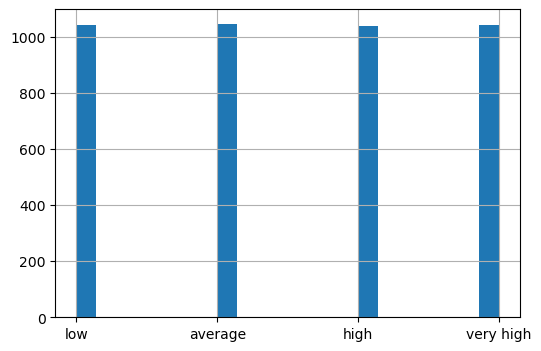

In [5]:
#START CODE HERE
df_onehot['wage_class'].hist(figsize=(6,4),bins=21);
#df_onehot.to_csv('PSID_earnings_onehot.csv')
#END CODE HERE

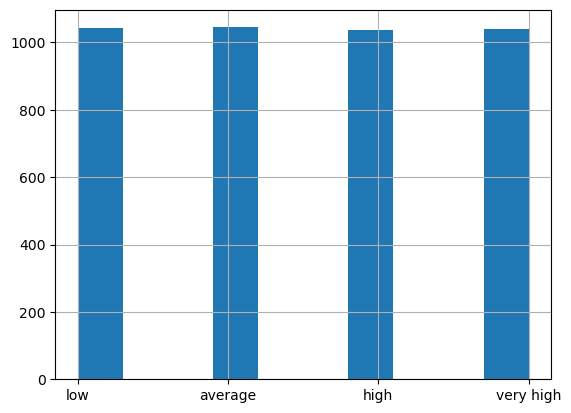

In [6]:
plt.hist(y);
plt.grid(True)

> **Are the classes well balanced?**

- Answer: yes, they are.

### (c) Split the data in 80% training data and 20% test data


In [7]:
# Data Pre-processing Libraries
from sklearn.model_selection import train_test_split
# START CODE HERE #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)
# END CODE HERE #

### (d) Use the `StandardScaler` to standardize the data

In [8]:
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler

#START CODE HERE

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#END CODE HERE

### (e) Model Evaluation

Use the following **classifiers as baseline** for your classification and evaluate the **precision** (macro average: `average='macro'`) on the training and test data for each of these classifiers

- Random Forest classifier (`RandomForestClassifier`) with standard parameters
- k-nearest neighbors classifier (`KNeighborsClassifier`) with `k=3`
  


In [9]:
# Modelling Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

classes=['average', 'high', 'low', 'very high']


RandomForestClassifier()
['average' 'high' 'low' 'very high']


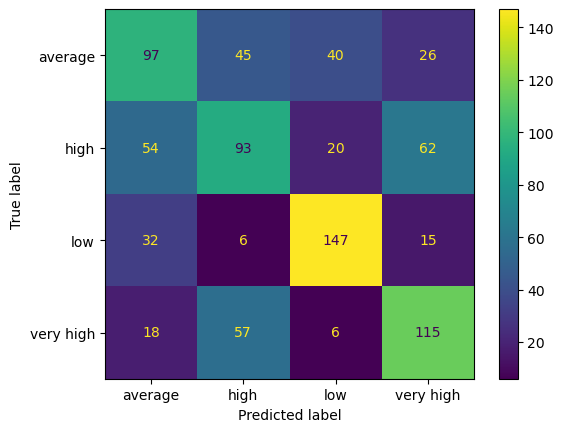

KNeighborsClassifier(n_neighbors=3)
['average' 'high' 'low' 'very high']


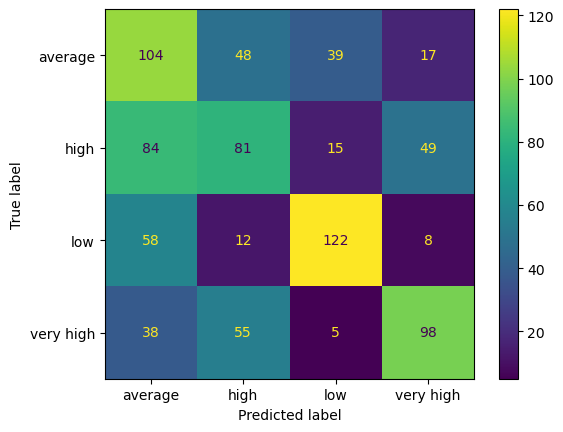

In [10]:

#START CODE HERE

models =[("RF", RandomForestClassifier()),
         ("kNN", KNeighborsClassifier(n_neighbors=3)) ]

results = []
names = []
finalResults = []

for name, model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    
    train_score = precision_score(y_train, model.predict(X_train), average='macro')
    test_score = precision_score(y_test, model_results, average='macro')
    
    results.append(test_score)
    names.append(name)
    finalResults.append((name, test_score, train_score))
    print(model)
    print(model.classes_)
    
    cm = confusion_matrix(y_test, model_results, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    
    
finalResults.sort(key=lambda k:k[1],reverse=True)


#END CODE HERE

In [11]:
finalResults

[('RF', 0.5407343531727588, 0.968087906860107),
 ('kNN', 0.5058157700631941, 0.7609962028455899)]

In [12]:
model.classes_

array(['average', 'high', 'low', 'very high'], dtype=object)

### (f) Plot a confusion matrix for each classifier and interpret the results

Plot a **Confusion Matrix** for each of the two classifiers, e.g. using
   - `cm = confusion_matrix(y_test, y_pred, labels=model.classes_)`
   - ` disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)`
   

Enter your comments in at least two sentences here:
- ...
- ...

###  (g) Hyperparameter Tuning of random forest

- Tune the hyperparameters a Random Forest Classifier `RandomForestClassifier()` using a 10-fold crossvalidated grid search using `GridSearchCV`. 
- Use the following hyperparameters for your grid search:
    - `params= {'n_estimators':[10,50,100,200], 'max_depth':list(range(1,7))}`
- Use the F1 (`f1_macro`) score as a metric.
- What are the best parameters out of the grid?

In [13]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
params= {'n_estimators':[10,50,100,200],
         'max_depth':list(range(1,7))}

In [14]:
from sklearn.model_selection import cross_val_score

#START CODE HERE

estimator= GridSearchCV(rf, params,cv=10, scoring='f1_macro', n_jobs=-1)
estimator.fit(X_train, y_train)

RF_par=estimator.best_params_

#END CODE HERE


In [15]:
RF_par

{'max_depth': 6, 'n_estimators': 200}

### (h) Compute and plot the permutation feature importances of the best tuned random forest classifier
- What are the most important factors for a high salary?


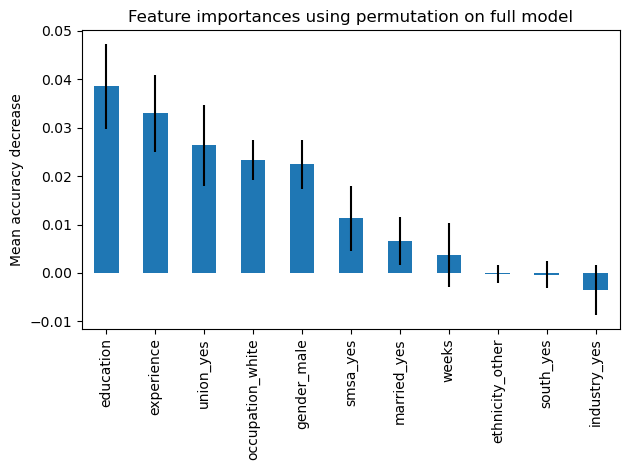

In [19]:
from sklearn.inspection import permutation_importance

#START CODE HERE 
# get the best model from the grid search CV
best_rf_model = estimator.best_estimator_
# compute the feature importances using permutation test
perm_importances = permutation_importance(
    best_rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
# put them in a Series
forest_importances = pd.Series(perm_importances.importances_mean, index=features)
# sort them (get the indices of the sorted array to be able to apply it on the errors)
sort_index = np.argsort(forest_importances)[::-1]

# plot the importances
fig, ax = plt.subplots()
forest_importances[sort_index].plot.bar(yerr=perm_importances.importances_std[sort_index], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#END CODE HERE


###  (i) Hyperparameter Tuning of kNN

- Hypertune a K-nearest neighbour classifier `KNeighborsClassifier()` using a 10-fold crossvalidated grid search. 
- Use the following parameters for your grid search:
    - `params= {'n_neighbors':list(range(20,50))}`
- Use the F1 score (`scoring=f1_macro`) as a metric.
- What are the best parameters for the number of neighbours?

In [20]:
knn=KNeighborsClassifier()
params= {'n_neighbors':list(range(20,50))}

In [21]:
#START CODE HERE

estimator= GridSearchCV(knn, params,cv=10,scoring='f1_macro', n_jobs=-1)
estimator.fit(X_train, y_train)
kNN_par=estimator.best_params_

#END CODE HERE


In [22]:
kNN_par

{'n_neighbors': 32}

### (j) Compare and discuss the differnt approaches

- Considering the classifiers (e/f) where the hyperparameters were not tuned and those where the hyperparameters were tuned (g/i), respectively, which classifier would you recommend and why?

Answers:
- ...
- ... 

## Upload this notebook as ipynb-File and as html-File (File  →  Download as  →  HTML) to the upload field of this question (2 files are allowed). 